# Relationship between MOSES metrics and binding affinity

In [4]:
import os
import sys
sys.path.append("..")  # add top folder to path

from pathlib import Path

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from moses.metrics.utils import get_mol, mol_passes_filters, logP, QED, SA, weight

In [16]:
logs_ccr5 = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/valid_sample_1e5/logs/summary.csv")
logs_ccr5.head()

,Unnamed: 0,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,...,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10,uuid
0,0,-8.9,-8.3,-8.3,-8.3,-8.2,-8.1,-8.0,-8.0,-7.8,...,8.968,7.124,6.804,8.272,5.938,8.674,7.001,8.568,4.386,f5c4bf40
1,1,-9.7,-9.4,-9.2,-9.1,-8.5,-8.4,-8.1,-8.0,-8.0,...,7.237,3.220,2.763,8.205,8.733,10.832,3.882,8.752,9.361,9f2f1607
2,2,-10.9,-10.8,-10.5,-10.2,-10.1,-10.0,-9.9,-9.6,-9.3,...,9.063,7.328,2.840,10.573,6.107,10.287,10.492,10.706,11.499,814f1cfa
3,3,-8.6,-8.6,-8.5,-8.5,-8.5,-8.3,-8.3,-8.1,-8.1,...,6.951,7.032,8.381,6.441,7.650,8.090,8.987,6.265,3.308,21cb5df6
4,4,-5.3,-5.2,-5.1,-5.0,-5.0,-4.8,-4.7,-4.5,-4.5,...,4.685,3.078,1.129,7.535,6.317,2.691,6.653,5.660,5.612,919dbc1d


In [48]:
def get_smiles_from_id(
    logs_path,
    samples_path
):
    req_ids = pd.read_csv(logs_path)["uuid"].values # requested IDs
    samples = pd.read_csv(samples_path)

    smi_corresp = samples[samples["uuid"].isin(req_ids)] # corresponding SMILES codes
    smi_corresp.drop_duplicates(subset="SMILES", inplace=True)
    smi_corresp.reset_index(drop=True, inplace=True)
    
    return smi_corresp

In [49]:
smi_corresp = get_smiles_from_id(
    "/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/valid_sample_1e5/logs/summary.csv",
    samples_path = "/Users/Munchic/Developer/Capstone/tinymolecule/data/gen/valid_sample_1e5.csv"
)

In [52]:
combined_df = pd.merge(smi_corresp, logs_ccr5, on="uuid")

In [63]:
mol_objs = [get_mol(smi) for smi in combined_df["SMILES"]]

<Figure size 660x660 with 0 Axes>

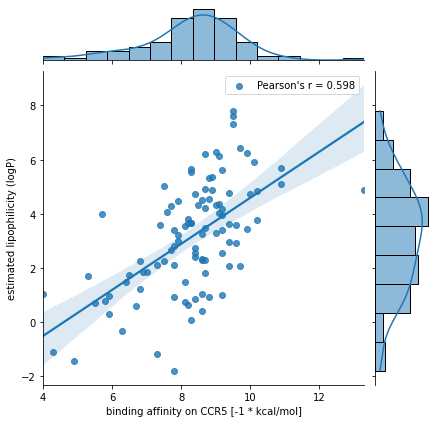

In [77]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_df["affin_kcal_mol-1_1"] * (-1)
y = [logP(mol) for mol in mol_objs]
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}")

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"estimated lipophilicity (logP)")
plt.legend()
plt.show()

<Figure size 660x660 with 0 Axes>

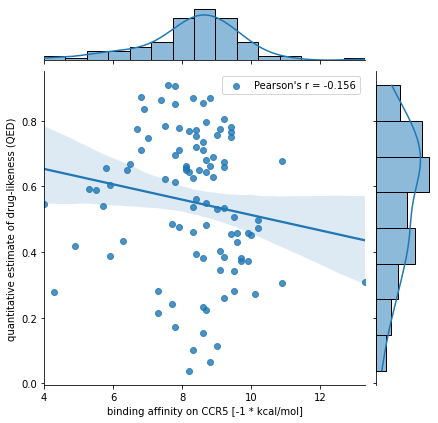

In [78]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_df["affin_kcal_mol-1_1"] * (-1)
y = [QED(mol) for mol in mol_objs]
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}")

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"quantitative estimate of drug-likeness (QED)")
plt.legend()
plt.show()

<Figure size 660x660 with 0 Axes>

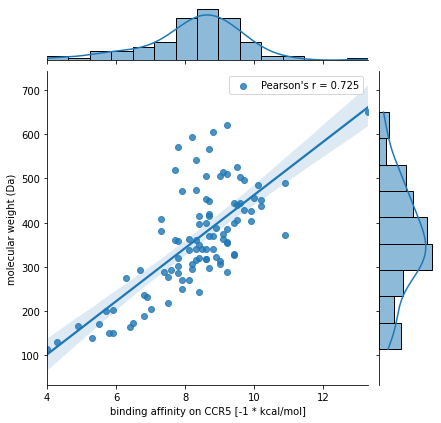

In [79]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_df["affin_kcal_mol-1_1"] * (-1)
y = [weight(mol) for mol in mol_objs]
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}")

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"molecular weight (Da)")
plt.legend()
plt.show()